In [1]:
# Librerias
import numpy as np
from numpy import arange
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import cv2
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
path_data = '/content/gdrive/MyDrive/UTEC/machine-learning/CK+48/'

# 1) Generar los vectores característica de las imágenes

In [4]:
def Haar(imagen, cortes):
 for i in range(cortes):
   LL, (LH, HL, HH) = pywt.dwt2(imagen, 'haar')
   imagen = LL
 return imagen

def vectorizar(matrix):
  return matrix.flatten()

def preprocesar(imagenes):
  imagenes_vectorizadas = []
  for imagen in imagenes:
    imagenes_vectorizadas.append(vectorizar(Haar(imagen, 1)))
  return imagenes_vectorizadas

In [5]:
ANG_TRAIN_PATH = path_data + "anger"
CON_TRAIN_PATH = path_data + "contempt"
DIS_TRAIN_PATH = path_data + "disgust"
FEA_TRAIN_PATH = path_data + "fear"
HAP_TRAIN_PATH = path_data + "happy"
SAD_TRAIN_PATH = path_data + "sadness"
SUR_TRAIN_PATH = path_data + "surprise"

def get_imagenes(dir_path):
  imagenes = []
  for img_path in os.listdir(dir_path):
    img_full_path = os.path.join(dir_path, img_path)
    img = cv2.imread(img_full_path)
    imagenes.append(img)
  return imagenes

In [6]:
%%time
train_ang = preprocesar(get_imagenes(ANG_TRAIN_PATH))
train_con = preprocesar(get_imagenes(CON_TRAIN_PATH))
train_dis = preprocesar(get_imagenes(DIS_TRAIN_PATH))
train_fea = preprocesar(get_imagenes(FEA_TRAIN_PATH))
train_hap = preprocesar(get_imagenes(HAP_TRAIN_PATH))
train_sad = preprocesar(get_imagenes(SAD_TRAIN_PATH))
train_sur = preprocesar(get_imagenes(SUR_TRAIN_PATH))

CPU times: user 641 ms, sys: 280 ms, total: 922 ms
Wall time: 2.65 s


# Creacion de la matriz x

In [7]:
print(np.shape(train_ang))
print(np.shape(train_con))
print(np.shape(train_dis))
print(np.shape(train_fea))
print(np.shape(train_hap))
print(np.shape(train_sad))
print(np.shape(train_sur))

(135, 2304)
(54, 2304)
(177, 2304)
(75, 2304)
(207, 2304)
(84, 2304)
(249, 2304)


In [8]:
m_train = len(train_ang) + len(train_con) \
  + len(train_dis) + len(train_fea) + len(train_hap) \
  + len(train_sad) + len(train_sur) 
k_train = np.shape(train_ang)[1]

In [9]:
X = np.concatenate((train_ang, train_con,train_dis,train_fea,train_hap,train_sad,train_sur)).reshape(m_train,k_train)

###*Creacion de las etiquetas y*: 
*   0: anger
*   1: contempt
*   2: disgust
*   3: fear
*   4: happy
*   5: sadness
*   6: surprise

In [10]:
y1_train = np.zeros(len(train_ang))
y2_train = np.ones(len(train_con))
y3_train = np.full(len(train_dis), 2)
y4_train = np.full(len(train_fea), 3)
y5_train = np.full(len(train_hap), 4)
y6_train = np.full(len(train_sad), 5)
y7_train = np.full(len(train_sur), 6)

y = np.concatenate((y1_train, y2_train,y3_train,y4_train,y5_train,y6_train,y7_train)).reshape(m_train, 1)
y.shape

(981, 1)

In [11]:
print(np.shape(X))
X

(981, 2304)


array([[ 27.,  27.,  31., ..., 300., 309., 309.],
       [225., 225., 124., ...,   4.,  28.,  28.],
       [ 68.,  68.,  32., ..., 190., 282., 282.],
       ...,
       [ 82.,  82.,  82., ...,  75.,  47.,  47.],
       [198., 198.,  96., ...,  66.,  56.,  56.],
       [146., 146., 153., ...,  82.,  98.,  98.]])

In [12]:
print(np.shape(y))
np.ravel(y)

(981, 1)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [13]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)
print(X.shape)
print(y.shape)
df_images = pd.concat([X,y], axis=1)
print(df_images.shape)

(981, 2304)
(981, 1)
(981, 2305)


## 2) Modelo SVM

###*Generar las particiones*: 

In [14]:
test_size=0.20
semilla=333
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=semilla)

###*Calculo del error y Bias*: 

In [15]:
def error_y_bias(y_pred,y_test):
  #Bias
  bias = np.mean(np.ravel(y_test) - np.ravel(y_pred))
  #Error
  error = np.mean(np.ravel(y_pred) != np.ravel(y_test))
  #Varianza Error
  varError = np.std(np.ravel(y_pred) != np.ravel(y_test))
  #Varianza Predicción
  var = np.mean(np.ravel(y_pred)**2) - np.mean(np.ravel(y_pred))**2

  return bias, error, varError, var

###*Modelos SVM con diferentes kernel*: 

In [16]:
# def linear_svc(X, y, C):
#   classifier = LinearSVC(C=C, max_iter=10000)
#   classifier.fit(X, np.ravel(y))
#   return classifier

In [17]:
def svc_linear_kernel(X, y, C):
  classifier = SVC(kernel='linear', C=C)
  classifier.fit(X, np.ravel(y))
  return classifier

In [18]:
def svc_rbf_kernel(X, y, C):
  classifier = SVC(kernel='rbf', gamma=0.7, C=C)
  classifier.fit(X, np.ravel(y))
  return classifier

In [19]:
def svc_poly_kernel(X, y, C):
  classifier = SVC(kernel='poly', degree=3, gamma='auto', C=C)
  classifier.fit(X, np.ravel(y))
  return classifier

# Cambio del parámetro C de 1 a 10

In [20]:
def try_svm(model_name):
  model_function = None
  if model_name == "svc_linear_kernel":
    model_function = svc_linear_kernel
  elif model_name == "svc_rbf_kernel":
    model_function = svc_rbf_kernel
  elif model_name == "svc_poly_kernel":
    model_function = svc_poly_kernel

  c_list = [0.1,1, 10, 100]
  error_list = []
  varError = []
  bias_list = []
  variance_list = []
  accuracy_list = []

  for c in c_list:
    svm_model = model_function(X_train, y_train, C=c)
    pred_i = svm_model.predict(X_test)
    b,e,ve,v = error_y_bias(pred_i,y_test)
    accuracy = accuracy_score(y_test, pred_i)

    bias_list.append(b)
    error_list.append(e)
    varError.append(ve)
    variance_list.append(v)
    accuracy_list.append(accuracy)
    print(f"C: {c}")
    print(f"Error: {e}")
    print(f"Accuracy: {accuracy}")
    print()

  return c_list, error_list, varError, bias_list, variance_list, accuracy_list

def plot_graphs(c_list, error_list, varError, bias_list, variance_list, accuracy_list):
  fig, axs = plt.subplots(3, 2,figsize=(18,9))
  fig.tight_layout(pad=3.0)

  axs[0, 0].plot(c_list, bias_list, color='red', linestyle='dashed', marker='o',
          markerfacecolor='blue', markersize=10)
  axs[0, 0].set_title('Bias vs C')
  axs[0, 0].set_xlabel('C')
  axs[0, 0].set_ylabel('Bias')


  axs[0, 1].plot(c_list, variance_list, color='red', linestyle='dashed', marker='o',
          markerfacecolor='blue', markersize=10)
  axs[0, 1].set_title('Varianza de la predicción vs C')
  axs[0, 1].set_xlabel('C')
  axs[0, 1].set_ylabel('Varianza de la predicción')

  axs[1, 0].plot(c_list, error_list, color='red', linestyle='dashed', marker='o',
          markerfacecolor='blue', markersize=10)
  axs[1, 0].set_title('Error Rate vs C')
  axs[1, 0].set_xlabel('C')
  axs[1, 0].set_ylabel('Mean Error')


  axs[1, 1].plot(c_list, varError, color='red', linestyle='dashed', marker='o',
          markerfacecolor='blue', markersize=10)
  axs[1, 1].set_title('Varianza del Error vs C')
  axs[1, 1].set_xlabel('C')
  axs[1, 1].set_ylabel('Varianza del Error')

  axs[2, 0].plot(c_list, accuracy_list, color='red', linestyle='dashed', marker='o',
          markerfacecolor='blue', markersize=10)
  axs[2, 0].set_title('Accuracy del modelo vs C')
  axs[2, 0].set_xlabel('C')
  axs[2, 0].set_ylabel('Accuracy del modelo')

  axs[2, 1].set_visible(False)

## Using SVC with linear kernel

In [21]:
c_list, error_list, varError, bias_list, variance_list, accuracy_list = try_svm("svc_linear_kernel")

C: 0.1
Error: 0.015228426395939087
Accuracy: 0.9847715736040609

C: 1
Error: 0.015228426395939087
Accuracy: 0.9847715736040609

C: 10
Error: 0.015228426395939087
Accuracy: 0.9847715736040609

C: 100
Error: 0.015228426395939087
Accuracy: 0.9847715736040609



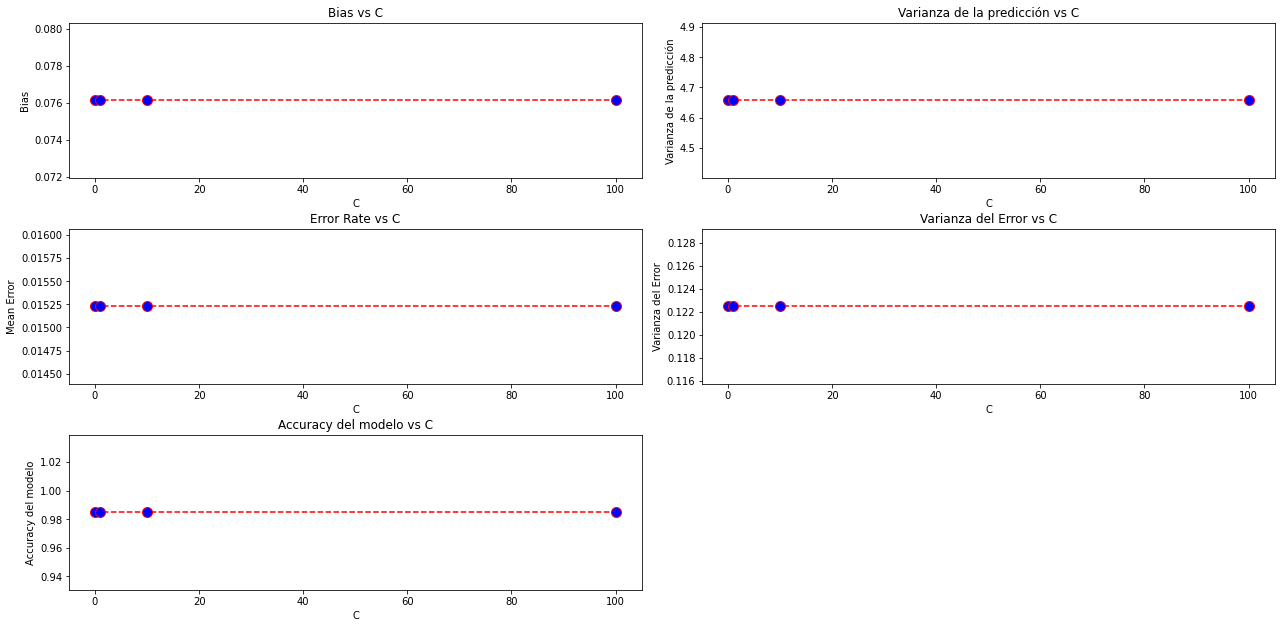

In [22]:
plot_graphs(c_list, error_list, varError, bias_list, variance_list, accuracy_list)

## Using SVC with RBF kernel

In [23]:
c_list, error_list, varError, bias_list, variance_list, accuracy_list = try_svm("svc_rbf_kernel")

C: 0.1
Error: 0.7208121827411168
Accuracy: 0.27918781725888325

C: 1
Error: 0.7208121827411168
Accuracy: 0.27918781725888325

C: 10
Error: 0.7208121827411168
Accuracy: 0.27918781725888325

C: 100
Error: 0.7208121827411168
Accuracy: 0.27918781725888325



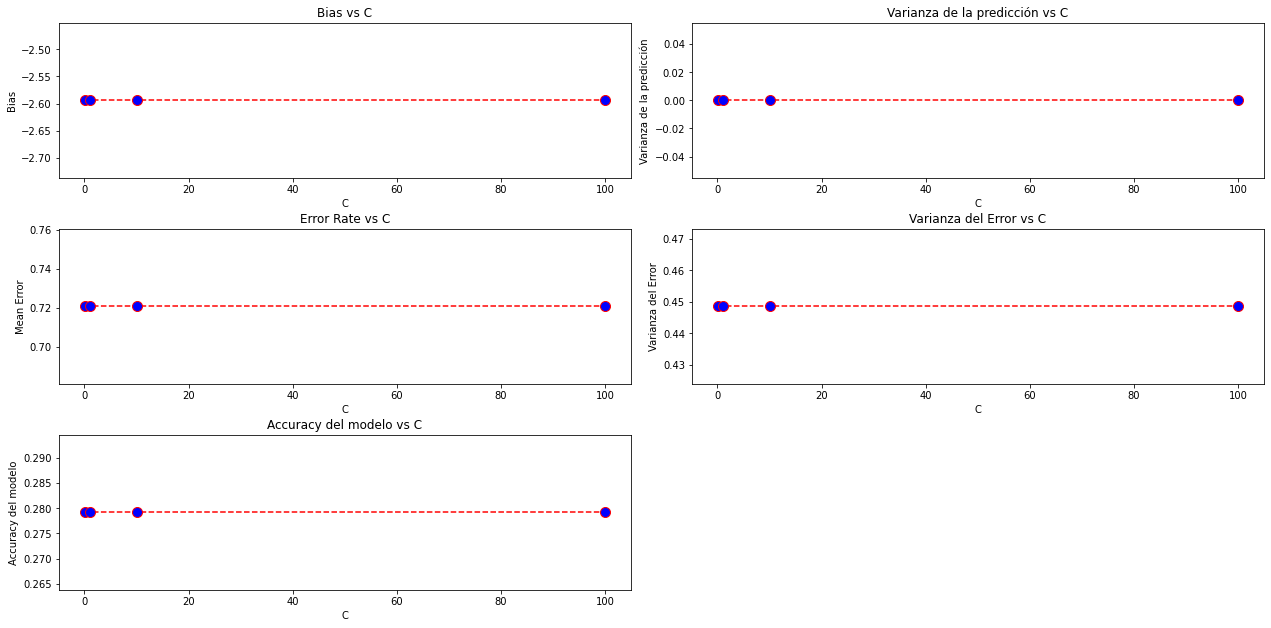

In [24]:
plot_graphs(c_list, error_list, varError, bias_list, variance_list, accuracy_list)

## Using SVC with Poly kernel

In [25]:
c_list, error_list, varError, bias_list, variance_list, accuracy_list = try_svm("svc_poly_kernel")

C: 0.1
Error: 0.015228426395939087
Accuracy: 0.9847715736040609

C: 1
Error: 0.015228426395939087
Accuracy: 0.9847715736040609

C: 10
Error: 0.015228426395939087
Accuracy: 0.9847715736040609

C: 100
Error: 0.015228426395939087
Accuracy: 0.9847715736040609



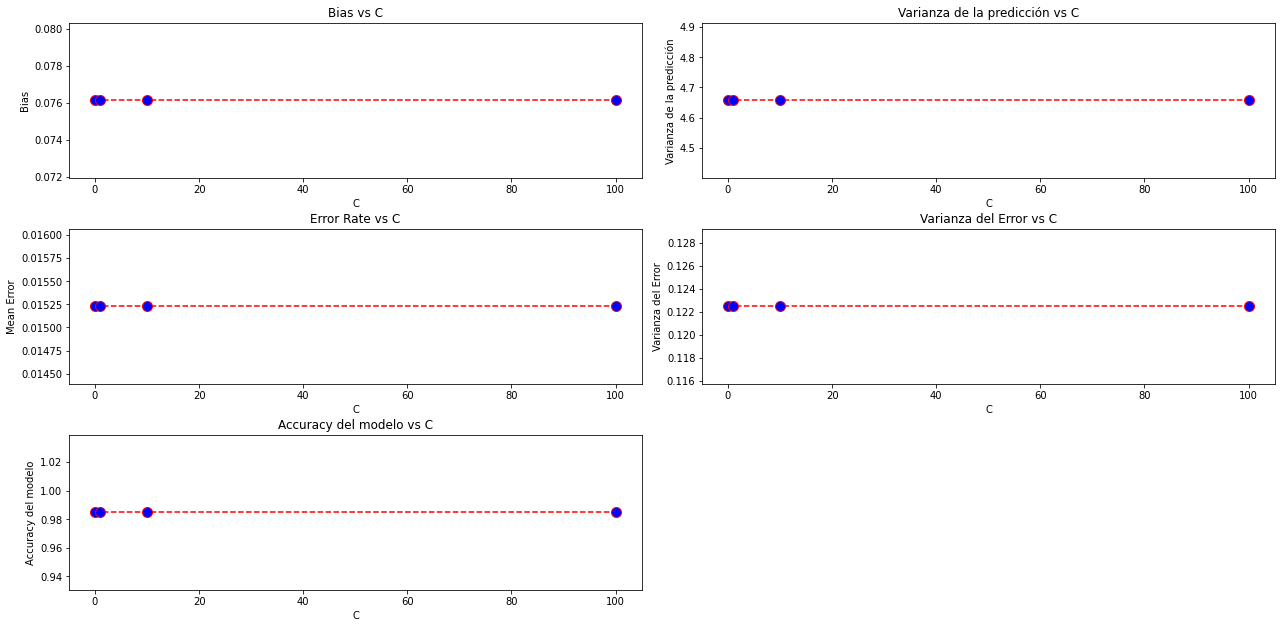

In [26]:
plot_graphs(c_list, error_list, varError, bias_list, variance_list, accuracy_list)

###*K-fold:* 

In [27]:
def kfold(C, n_splits): 
  svm_model = SVC(kernel='linear', C=C)
  svm_scores = cross_val_score(svm_model, X,np.ravel(y), cv=KFold(n_splits=n_splits,shuffle = True))
  svm_model.fit(X_train, np.ravel(y_train))
  predictions = svm_model.predict(X_test)
  b,e,ve,v = error_y_bias(predictions,y_test)
  print('****************')
  print('K-fold Cross validation con ',n_splits,' splits')
  print('  Ejecutando SVC con ', C,' C y se obtuvo:')
  print("    - %0.2f bias con varianza de %0.2f" % (b, v))
  print("    - %0.2f error con varianza de %0.2f" % (e, ve))
  print("    - %0.2f accuracy score con desviación estándar de %0.2f" % (svm_scores.mean(), svm_scores.std()))
  print('****************')

In [28]:
%%time
kfold(C=1, n_splits=5)

****************
K-fold Cross validation con  5  splits
  Ejecutando SVC con  1  C y se obtuvo:
    - 0.08 bias con varianza de 4.66
    - 0.02 error con varianza de 0.12
    - 0.99 accuracy score con desviación estándar de 0.01
****************
CPU times: user 7.34 s, sys: 20.1 ms, total: 7.36 s
Wall time: 7.34 s


In [29]:
%%time
kfold(C=10, n_splits=5)

****************
K-fold Cross validation con  5  splits
  Ejecutando SVC con  10  C y se obtuvo:
    - 0.08 bias con varianza de 4.66
    - 0.02 error con varianza de 0.12
    - 0.99 accuracy score con desviación estándar de 0.01
****************
CPU times: user 7.36 s, sys: 10.2 ms, total: 7.37 s
Wall time: 7.35 s


In [30]:
%%time
kfold(C=100, n_splits=5)

****************
K-fold Cross validation con  5  splits
  Ejecutando SVC con  100  C y se obtuvo:
    - 0.08 bias con varianza de 4.66
    - 0.02 error con varianza de 0.12
    - 1.00 accuracy score con desviación estándar de 0.00
****************
CPU times: user 7.39 s, sys: 9.59 ms, total: 7.4 s
Wall time: 7.4 s


###*Bootstrap:*

In [31]:
def bootstrap(C, n_iterations):   
  n_size = int(len(X) * (1 - test_size)) 
  values = df_images.values
  bo_scores = list()
  for i in range(n_iterations):
      train = resample(values, n_samples = n_size, replace=True, stratify=y) 
      test = np.array([s for s in values if s.tolist() not in train.tolist()]) 
      svm_bo = SVC(kernel='linear', C=C)
      svm_bo.fit(train[:,:-1], train[:,-1])
      predictions = svm_bo.predict(test[:,:-1]) 
      score = accuracy_score(test[:,-1], predictions) 
      bo_scores.append(score)
      b,e,ve,v = error_y_bias(predictions,test[:,-1])
  
  print('****************')
  print('Bootstrap Cross validation con ',n_iterations,' iteraciones')
  print('  Ejecutando SVC con ',C,' C y se obtuvo:')
  print("    - %0.2f bias con varianza de %0.2f" % (b, v))
  print("    - %0.2f error con varianza de %0.2f" % (e, ve))
  print("    - %0.2f accuracy score con desviación estándar de %0.2f" % (np.mean(bo_scores), np.std(bo_scores)))
  print('****************')

In [32]:
%%time
bootstrap(C=1, n_iterations=4)

****************
Bootstrap Cross validation con  4  iteraciones
  Ejecutando SVC con  1  C y se obtuvo:
    - 0.08 bias con varianza de 4.38
    - 0.04 error con varianza de 0.18
    - 0.95 accuracy score con desviación estándar de 0.02
****************
CPU times: user 4min 10s, sys: 31.2 s, total: 4min 41s
Wall time: 4min 41s


In [33]:
%%time
bootstrap(C=10, n_iterations=4)

****************
Bootstrap Cross validation con  4  iteraciones
  Ejecutando SVC con  10  C y se obtuvo:
    - -0.05 bias con varianza de 4.29
    - 0.02 error con varianza de 0.13
    - 0.96 accuracy score con desviación estándar de 0.02
****************
CPU times: user 4min 18s, sys: 732 ms, total: 4min 18s
Wall time: 4min 18s


In [34]:
%%time
bootstrap(C=100, n_iterations=4)

****************
Bootstrap Cross validation con  4  iteraciones
  Ejecutando SVC con  100  C y se obtuvo:
    - 0.03 bias con varianza de 4.35
    - 0.04 error con varianza de 0.21
    - 0.96 accuracy score con desviación estándar de 0.01
****************
CPU times: user 4min 25s, sys: 801 ms, total: 4min 26s
Wall time: 4min 25s


##  Crear una matriz de confusion y analizar los resultados.

In [35]:
svm_model = svc_linear_kernel(X, y, C=10)
y_pred = svm_model.predict(X_test)

In [36]:
accuracy_score(y_test, y_pred)

1.0

In [37]:
b,e,ve,v = error_y_bias(y_pred,y_test)
print("El bias calculado es %0.2f" %b)
print("El error calculado es %0.2f" %e)
print("La varianza del error es %0.2f" %ve)
print("La varianza es %0.2f" %v)


El bias calculado es 0.00
El error calculado es 0.00
La varianza del error es 0.00
La varianza es 4.68


In [38]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        29
         1.0       1.00      1.00      1.00        16
         2.0       1.00      1.00      1.00        36
         3.0       1.00      1.00      1.00         5
         4.0       1.00      1.00      1.00        42
         5.0       1.00      1.00      1.00        14
         6.0       1.00      1.00      1.00        55

    accuracy                           1.00       197
   macro avg       1.00      1.00      1.00       197
weighted avg       1.00      1.00      1.00       197



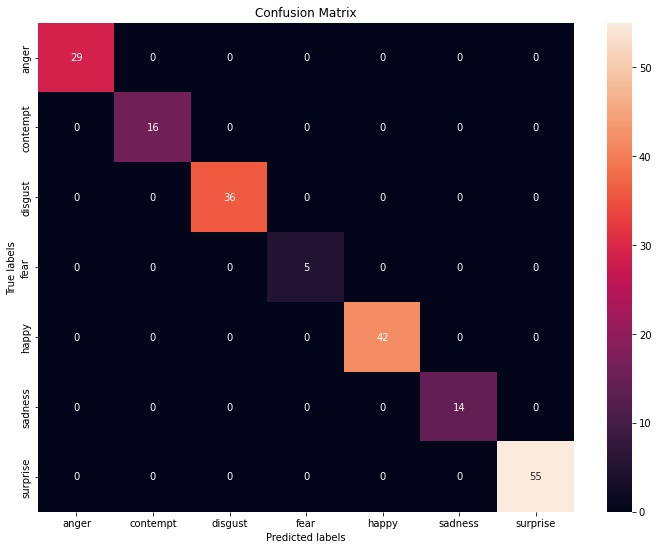

In [39]:
#ax= plt.subplot()
fig, ax= plt.subplots(figsize=(12,9))

#fig, axs = plt.subplots(3, 2,figsize=(18,9))
#fig.tight_layout(pad=3.0)

sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']); 
ax.yaxis.set_ticklabels(['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']);

*   0: anger
*   1: contempt
*   2: disgust
*   3: fear
*   4: happy
*   5: sadness
*   6: surprise
